<a href="https://colab.research.google.com/github/IngerMasha/week8_day2/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Mini_Project_2_Data_Preprocessing_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

wine_quality = pd.read_csv('/content/winequality-red.csv')
print("Dataset info:")
print(wine_quality.info())
print("\nFirst rows of the dataset:")
print(wine_quality.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

First rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0

In [ ]:
import numpy as np
print("\nMissing values:")
print(wine_quality.isnull().sum())
wine_quality = wine_quality[wine_quality['quality'].between(3, 9)]
wine_quality['sugar_log'] = np.log1p(wine_quality['residual sugar'])



Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


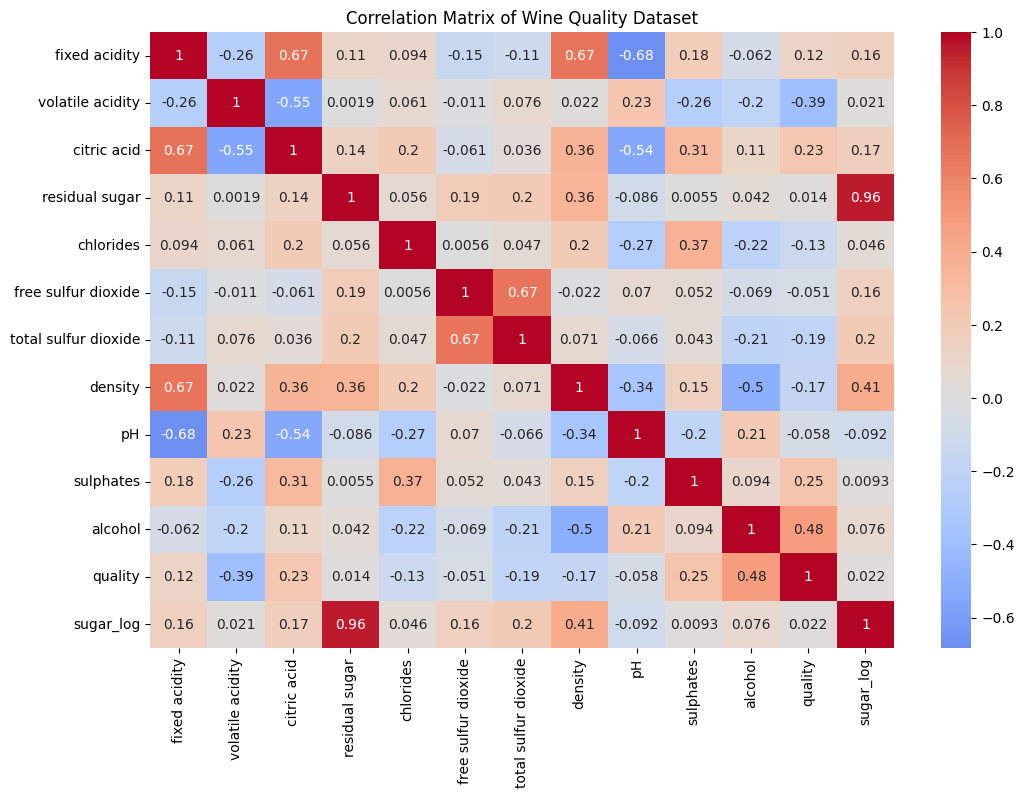


Correlation of chemical properties with wine quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
sugar_log               0.021687
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = wine_quality.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Wine Quality Dataset")
plt.show()

quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("\nCorrelation of chemical properties with wine quality:")
print(quality_corr)


In [ ]:
wine_red_white = pd.read_csv('/content/wine-quality-white-and-red.csv')
print("Dataset info:")
print(wine_red_white.info())
print("\nFirst rows of the dataset:")
print(wine_red_white.head())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

First rows of the dataset:
    type  fixed 

In [ ]:
print("\nMissing values:")
print(wine_red_white.isnull().sum())


Missing values:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


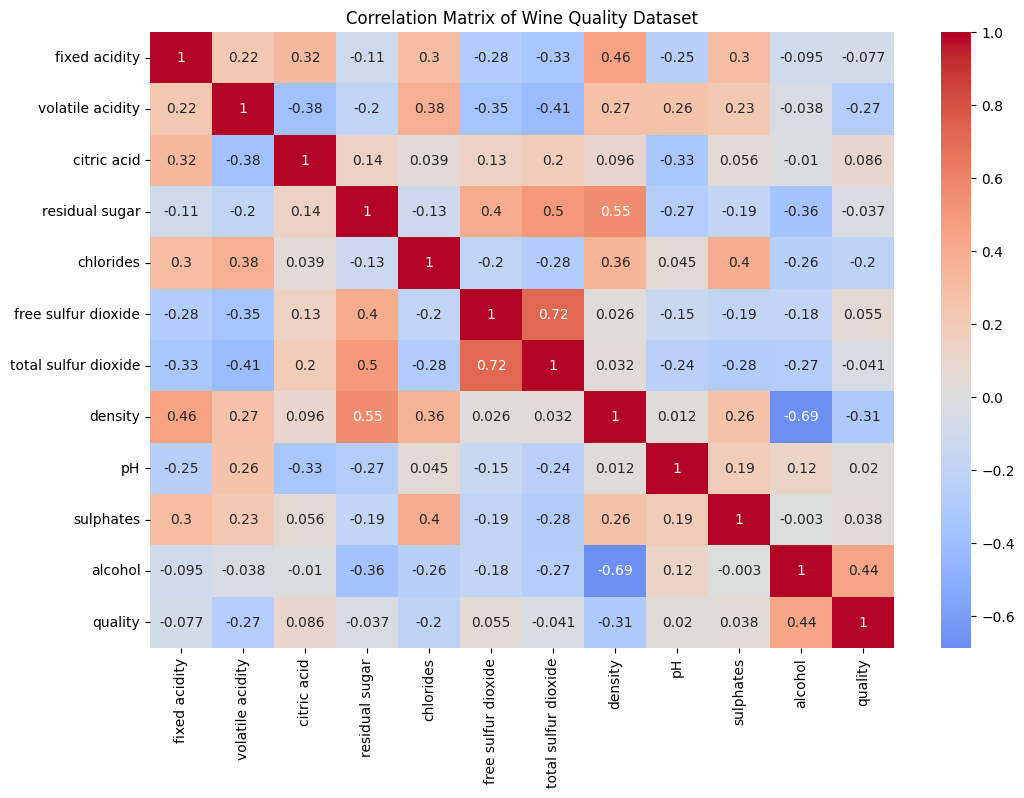


Correlation of chemical properties with wine quality:
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = wine_red_white.drop('type', axis=1).corr()

# Тепловая карта корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Wine Quality Dataset")
plt.show()

# Корреляция отдельных свойств с качеством
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("\nCorrelation of chemical properties with wine quality:")
print(quality_corr)


Unique values in 'type' column:
['white' 'red']


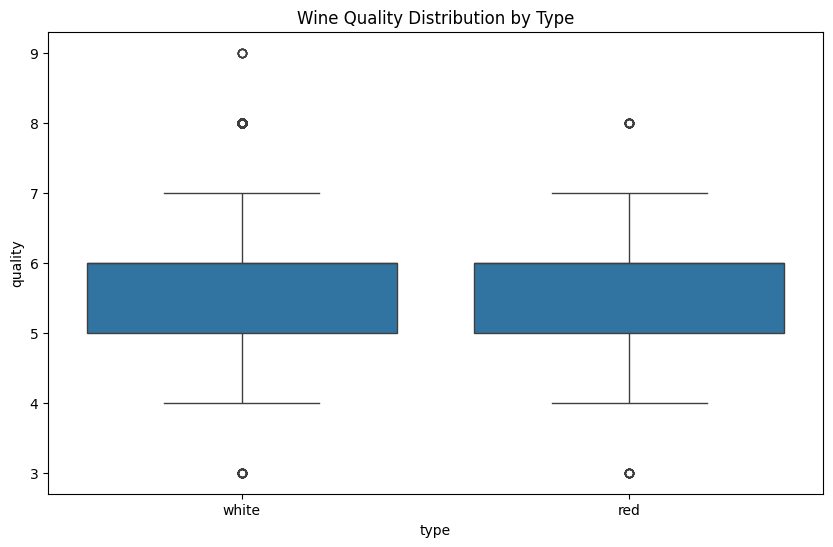


T-statistic: -9.685649554187696, P-value: 4.888069044201508e-22


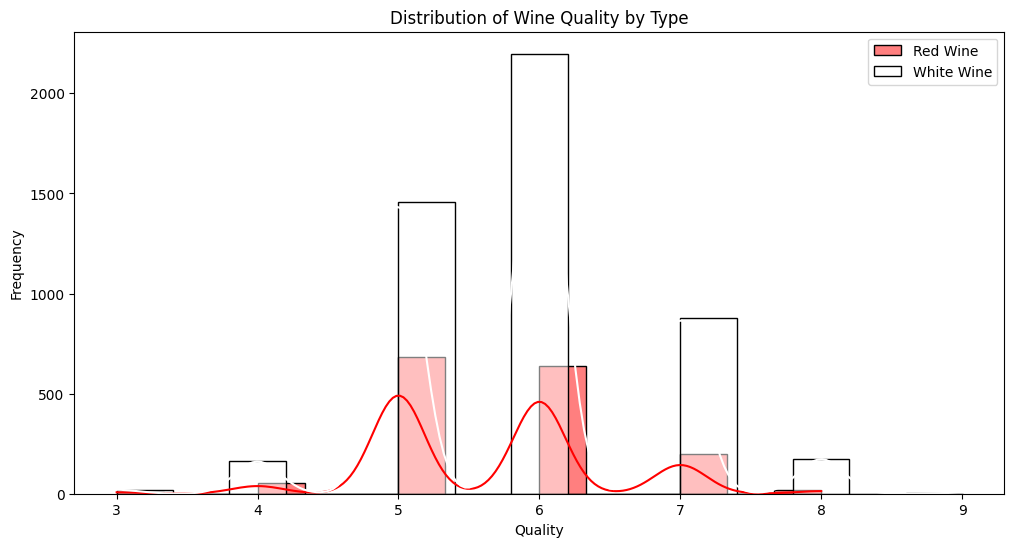


Quality statistics by wine type:
        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


In [ ]:
# Проверка уникальных значений в столбце типа вина
print("\nUnique values in 'type' column:")
print(wine_red_white['type'].unique())

# Распределение качества по типу вина
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='quality', data=wine_red_white)
plt.title("Wine Quality Distribution by Type")
plt.show()

# Статистический тест для проверки значимости разницы в качестве
from scipy.stats import ttest_ind

wine_red = wine_red_white[wine_red_white['type'] == 'red']
wine_white = wine_red_white[wine_red_white['type'] == 'white']

t_stat, p_val = ttest_ind(wine_red['quality'], wine_white['quality'])
print(f"\nT-statistic: {t_stat}, P-value: {p_val}")

plt.figure(figsize=(12, 6))
sns.histplot(wine_red['quality'], color='red', kde=True, label='Red Wine', bins=15)
sns.histplot(wine_white['quality'], color='white', kde=True, label='White Wine', bins=15)
plt.title("Distribution of Wine Quality by Type")
plt.legend()
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

quality_stats = wine_red_white.groupby('type')['quality'].describe()
print("\nQuality statistics by wine type:")
print(quality_stats)
